# Autograd:
Auto grad is a core component of PyTorch that provides automatic differentiation for tensor operations. It enables gradient computation, which is essential for training ML models using optimization algorithms like gradient descent.

### Example: 1

Without Autograd

In [68]:
def dy_dx(x):
  return 2*x

In [69]:
dy_dx(3)

6

With Autograd

In [70]:
import torch

In [71]:
x = torch.tensor(3.0, requires_grad=True)

In [72]:
y = x**2

In [73]:
x

tensor(3., requires_grad=True)

In [74]:
y

tensor(9., grad_fn=<PowBackward0>)

In [75]:
y.backward()

In [76]:
x.grad

tensor(6.)

### Example: 2

Without Autograd

In [77]:
import math

def dz_dx(x):
    return 2 * x * math.cos(x**2)

In [78]:
dz_dx(4)

-7.661275842587077

With Autograd

In [79]:
x = torch.tensor(4.0, requires_grad=True)

In [80]:
y = x ** 2

In [81]:
z = torch.sin(y)

In [82]:
x

tensor(4., requires_grad=True)

In [83]:
y

tensor(16., grad_fn=<PowBackward0>)

In [84]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [85]:
z.backward()

In [86]:
x.grad

tensor(-7.6613)

In [87]:
y.grad

/tmp/ipython-input-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


### Example: 3

Without Autograd

In [88]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [89]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [90]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [91]:
loss

tensor(6.7012)

In [92]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [93]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


With Autograd

In [94]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [95]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [96]:
w

tensor(1., requires_grad=True)

In [97]:
b

tensor(0., requires_grad=True)

In [98]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [99]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [100]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [101]:
loss.backward()

In [102]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


# Autograd on Vector

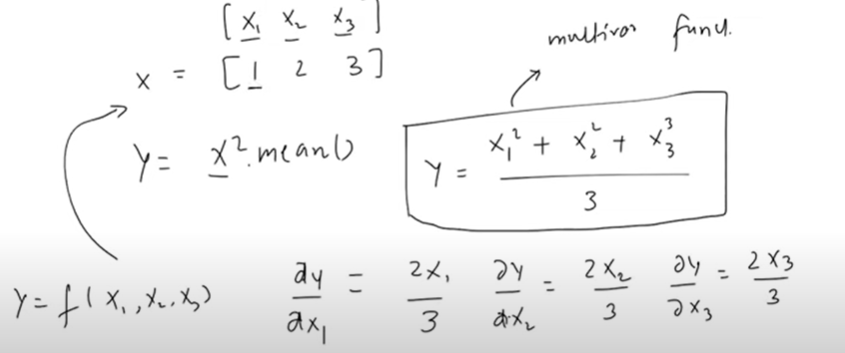

In [103]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

In [104]:
x

tensor([1., 2., 3.], requires_grad=True)

In [105]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [106]:
y.backward()

In [107]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

If we not clear the gradient then gradient accumulate each time when we run the cell

In [108]:
# clearing grad
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [109]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [110]:
y.backward()

In [111]:
x.grad

tensor(4.)

In [112]:
x.grad.zero_()

tensor(0.)

In [113]:
# disable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [114]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [115]:
y.backward()

In [116]:
x.grad

tensor(4.)

# Disable gradient tracking
- option 1 - requires_grad_(False)
- option 2 - detach()
- option 3 - torch.no_grad()

### option 1 - requires_grad_(False)

In [117]:
x.requires_grad_(False)

tensor(2.)

In [118]:
x

tensor(2.)

In [119]:
y = x ** 2

In [120]:
y

tensor(4.)

In [121]:
# y.backward()
# Here we got an error because we clear the gradient

### option 2 - detach()

In [122]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [123]:
z = x.detach()
z

tensor(2.)

In [124]:
y = x ** 2

In [125]:
y

tensor(4., grad_fn=<PowBackward0>)

In [126]:
y1 = z ** 2
y1

tensor(4.)

In [127]:
y.backward()

In [128]:
# y1.backward()
# Here we got an error because we clear the gradient for y1

### option 3 - torch.no_grad()

In [129]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [130]:
with torch.no_grad():
  y = x ** 2

In [131]:
y

tensor(4.)

In [132]:
# y.backward()
# Here we got an error because we clear the gradient